# Milestone 2: Exploratory Data Analysis
#### Eduardo Sequeira
---

For this milestone, **exploratory data analysis (EDA)** will be conducted on the selected dataset for the project.

## 1. Introduction

For this EDA, there are two main questions that we seek to answer:
1. Which videogame *genre* tends to *sell better / more*?
2. What is the *correlation* between *game ratings, sales, and genre*?
3. When did ratings begin for videogames?

The first question is a basic, direct, comparison. The second question is more towards divining the relationships between the three critiera mentioned. The third question, for curiosity, is based around when were the first ratings applied to videogames, or start becoming something expected?

Before carrying out the EDA, we need to first clean the dataset. But before cleaning the dataset, we must first understand it and identify what data we need to answer the above questions.

## 2. Manipulating and Cleaning the Data

To begin reviewing the data, we must first load in the required libraries for the EDA and the raw dataset. Once this is done, we can start analyzing the data and then perform the analysis. 

In [59]:
# Loading the required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import sys
sys.path.insert(1, '../../scripts')

# Imports the project_functions.py file containing the different functions
import project_functions

# Save the project_functions loadCleanFile function as being the rawdataclean (has been cleaned already now)
rawdataclean = project_functions.load_and_process()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB
None


../../scripts\project_functions.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rawdata.User_Score[rownumber] = 'NaN'


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             6825 non-null   string  
 1   Platform         6825 non-null   category
 2   Year_of_Release  6825 non-null   int64   
 3   Genre            6825 non-null   category
 4   Publisher        6825 non-null   string  
 5   NA_Sales         6825 non-null   float64 
 6   EU_Sales         6825 non-null   float64 
 7   JP_Sales         6825 non-null   float64 
 8   Other_Sales      6825 non-null   float64 
 9   Global_Sales     6825 non-null   float64 
 10  Critic_Score     6825 non-null   float64 
 11  Critic_Count     6825 non-null   float64 
 12  User_Score       6825 non-null   float64 
 13  User_Count       6825 non-null   float64 
 14  Developer        6825 non-null   string  
 15  Rating           6825 non-null   category
dtypes: category(3), float64(9), int64(1), stri

../../scripts\project_functions.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Name'] = dataclean['Name'].astype("string")
../../scripts\project_functions.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataclean['Platform'] = dataclean['Platform'].astype("category")
../../scripts\project_functions.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

### Column Analysis

Now that we have the cleaned set of the raw data, we want to read into it and check what are the columns we have.

In [60]:
# Read the column names that we have
print(rawdataclean.columns.values)


['Name' 'Platform' 'Year_of_Release' 'Genre' 'Publisher' 'NA_Sales'
 'EU_Sales' 'JP_Sales' 'Other_Sales' 'Global_Sales' 'Critic_Score'
 'Critic_Count' 'User_Score' 'User_Count' 'Developer' 'Rating']


From the column name list above, to answer our questions, we really only need to have three columns: the **Genre**, **Global_Sales**, and **Rating** columns. With these three columns, we will be able to answer which videogame genres sell better, and find if there are any correlations between the ratings, sales and the genres. For curiosity and to address the third question, we will also need the **Year_of_Release** column. We will also keep the **Name** column as well, for our own interest to see what are some of the videogame names we will be working with.


###  Column Selection

Let's begin by selecting only the columns that are of interest to us to answer our questions: **Year_of_Release**, **Genre**, **Global_Sales**, and **Rating**. We will also keep the column **Name** just for interest, for summarizing later to give an example of some games that exist in each category.

In [61]:
# Select only the Name, Year_of_Release, Genre, Global_Sales, and Rating columns

# Filters the five columns that we are interested in and saves them over the dataset
dataclean = rawdataclean.filter(['Name','Year_of_Release','Genre','Global_Sales','Rating'])

display(dataclean.head())

print(dataclean.info())

,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006,Sports,82.53,E
1,Mario Kart Wii,2008,Racing,35.52,E
2,Wii Sports Resort,2009,Sports,32.77,E
3,New Super Mario Bros.,2006,Platform,29.80,E
4,Wii Play,2006,Misc,28.92,E


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6825 entries, 0 to 6824
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Name             6825 non-null   string  
 1   Year_of_Release  6825 non-null   int64   
 2   Genre            6825 non-null   category
 3   Global_Sales     6825 non-null   float64 
 4   Rating           6825 non-null   category
dtypes: category(2), float64(1), int64(1), string(1)
memory usage: 174.2 KB
None


### Data Analysis

From the above, we see that we have now we have a total of five columns that we are interested in, and that all five columns have the same number of rows, 6825, which is perfect and what we want. We also know now that each of these rows are "complete" meaning that there are no NaNs in our dataset.

From the above, we also see how the load_and_process function set up the dataset with the data types the way we want them.  
**Name** is set as a string.  
**Year_of_Release** is set as an integer.  
**Genre** and **Rating** are both set as categories.  
**Global_Sales** is set as a float.

Now that we only have the five columns of interest, we can proceed to the next task that will be to begin the EDA.

### Rating Column

By looking at the Rating column, we see ratings like E, M, T, RP, etc. We can conclude that these are Entertainment Software Rating Board (ESRB) Ratings. In 1994 the *K-A* rating, which was for Kids-Adults, was changed to *E* rating for Everyone.  \
To keep things consistent with the representation (since there is only one *K-A* ratings later on ), we will change the *K-A* to *E* here. 

In [62]:
# Takes the indicies of the dataclean dataframe
index = dataclean.index
changes = 0

for rownumber in dataclean.index:
    if dataclean.Rating[rownumber] == 'K-A':
        dataclean.Rating[rownumber] = 'E'
        changes += 1
    
print('Number of changes made:', changes)

Number of changes made: 1


We see above that the number of changes that were made converting the rating *K-A* to *E* was only 1. This was done to avoid a sudden spike or inconsitency in the K-A rating data. 

## 3. Exploratory Data Analysis

With everything now set up the way we need, and the data set cleaned, we can proceed and begin with doing the EDA.

### Unique Values Per Column

The first thing we are interested in knowing is the unique values that we have per column for the **Genre** and **Rating**.  
This will allow us to figure out how many genres of videogames are considered in this dataset, as well as the number of ratings that there are for he videogames.

In [63]:
# Unique values in Genre and Rating columns

# Unique genres
Videogame_Genres = list(dataclean.Genre.unique())

# Unique ratings
Videogame_Ratings = list(dataclean.Rating.unique())

print('The following are the unique genres considered in the dataset:', '\n', Videogame_Genres, '\n')

print('The following are the unique ratings considered in the dataset:', '\n', Videogame_Ratings)

The following are the unique genres considered in the dataset: 
 ['Sports', 'Racing', 'Platform', 'Misc', 'Action', 'Puzzle', 'Shooter', 'Fighting', 'Simulation', 'Role-Playing', 'Adventure', 'Strategy'] 

The following are the unique ratings considered in the dataset: 
 ['E', 'M', 'T', 'E10+', 'AO', 'RP']


Listing out the different unique genres present in the dataset, we see a total of 12 kinds of genre considered. We have stored these under the variable name Videogame_Genres.

In listing out the ratings, we see ratings like E, M, T, RP, etc. We have stored these under the variable name Videogame_Ratings. 

## 3.1 Question 1: Which videogame *genre* tends to *sell better / more*?

### Videogame Sales Based on Genre

The first question we want to address is to see which videogame genres sell the best! This can be done by looking into the column with the videogame **Genre** in the clean dataset and then look into the **Global_Sales** column. The idea to answer this question is to find the unique genres in the **Genre** column and then have a running sum for the values  for that row in the **Global_Sales** column.

In [64]:
# Begin setting up a dictionary for the genre_sales

# Creates the genre_sales dictionary
genre_sales = {    
}


# For each entry in the unique genres list (Videogame_Genres), 
# we want to make a new dictonary word and set it equal to 0 entries
for word in Videogame_Genres:
    genre_sales[word] = 0

# We want to move through the rows in the indicies here...
for rownumber in dataclean.index:
    # and store the respecitive values for that row from the genre column and sales column...
    genretype = dataclean.Genre[rownumber]
    gamesales = dataclean.Global_Sales[rownumber]
    # now check for the item in Videogame_Genres...
    for uniquegenre in Videogame_Genres:
        # if they are both equal
        if uniquegenre == genretype:
            # then add the value in the game sales column to that genre word stored in the dictionary!
            genre_sales[uniquegenre] += gamesales

# Format the values attached to the dictionary keys so that they have two decimal points (like in the original dataset)
for key in genre_sales:
    genre_sales[key] = round(genre_sales[key], 2)
    
print(genre_sales)

{'Sports': 833.85, 'Racing': 476.22, 'Platform': 377.8, 'Misc': 416.26, 'Action': 1203.16, 'Puzzle': 78.9, 'Shooter': 816.48, 'Fighting': 249.95, 'Simulation': 202.7, 'Role-Playing': 501.37, 'Adventure': 80.75, 'Strategy': 69.61}


#### Genre_Sales Dictionary

Above, we created a genre_sales dictionary that holds every unique genre present in the dataset, and has the respecitive summation of all the sales made for that specific genre! From this, we can proceed to making a bar chart based on what is stored in this dictionary.

#### Genres VS Sales Bar Chart

Here, we will be creating our Genres and Sales Bar Chart.

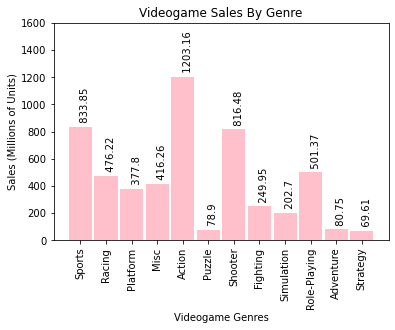

In [65]:
# Genres vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Genres)))
y = list(genre_sales.values())
labels = list(genre_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,1600])
plt.title('Videogame Sales By Genre')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of Units)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')

plt.savefig('Eduardo_EDA_Plots/sales_by_genre.png', bbox_inches='tight')
    
# Show the plot
plt.show()

From the above bar chart, we see that the *most popular game genre* is **Action**, followed by **Sports** and **Shooter** close behind. \
For the top three genres, we want to quickly take a look at some of the top sellers in each genre and check if there are any game series or titles that are easily recognizable. 

In [66]:
# What are the action, sports, and shooter games?

print("Action Games:")
display(dataclean.loc[dataclean['Genre'] == 'Action'])

print("Sports Games:")
display(dataclean.loc[dataclean['Genre'] == 'Sports'])

print("Shooter Games:")
display(dataclean.loc[dataclean['Genre'] == 'Shooter'])


Action Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
10,Grand Theft Auto V,2013,Action,21.04,M
11,Grand Theft Auto: San Andreas,2004,Action,20.81,M
13,Grand Theft Auto V,2013,Action,16.27,M
14,Grand Theft Auto: Vice City,2002,Action,16.15,M
23,Grand Theft Auto III,2001,Action,13.10,M
...,...,...,...,...,...
6814,Legacy of Kain: Defiance,2003,Action,0.01,M
6815,Trine,2009,Action,0.01,E10+
6819,Fast Racing Neo,2016,Action,0.01,E
6820,E.T. The Extra-Terrestrial,2001,Action,0.01,E


Sports Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006,Sports,82.53,E
2,Wii Sports Resort,2009,Sports,32.77,E
7,Wii Fit,2007,Sports,22.70,E
9,Wii Fit Plus,2009,Sports,21.79,E
51,FIFA 16,2015,Sports,8.57,E
...,...,...,...,...,...
6738,Don Bradman Cricket 14,2014,Sports,0.01,E
6755,Madden NFL 13,2012,Sports,0.01,E
6775,Tiger Woods PGA Tour 2005,2004,Sports,0.01,E
6799,Pro Evolution Soccer 2010,2009,Sports,0.01,E


Shooter Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
17,Call of Duty: Modern Warfare 3,2011,Shooter,14.73,M
18,Call of Duty: Black Ops,2010,Shooter,14.61,M
19,Call of Duty: Black Ops II,2012,Shooter,13.79,M
20,Call of Duty: Black Ops II,2012,Shooter,13.67,M
21,Call of Duty: Modern Warfare 2,2009,Shooter,13.47,M
...,...,...,...,...,...
6779,The Chronicles of Riddick: Assault on Dark Athena,2009,Shooter,0.01,M
6780,Conflict: Denied Ops,2008,Shooter,0.01,M
6785,Greg Hastings' Tournament Paintball Max'd,2006,Shooter,0.01,E10+
6803,Clive Barker's Jericho,2007,Shooter,0.01,M


**Action Games**: \
Here we see that we have a total of 1630 rows, meaning that there are 1630 games that are classed as being Action games. The first five games printed are all Grand Theft Auto (GTA) games, which are arguably (and evidently from the sales per game) one of the more popular videgame series that exist. Knowing the kind of action game this is, we then know that some other games in this list would include the Metal Gear games, Assassin's Creed games, Uncharted games, etc. \
**Sports Games**: \
We see that there is a total of 943 games that are classed as being Sport games. Sport games are fairly self explanatory, and include games like FIFA games, Wii Sports, etc. \
**Shooter Games**: \
Here we have a total of 864 games that are classed as being Shooter games. These games tend to be first person shooters, like the well known Call of Duty game series, and more games similar to that.

### Normalized Bar Chart for Genre and Sales

From the first bar chart above, we see that **Action**, **Sports**, and **Shooter** games have the most sales done, with roughly 1.2 billion, 833 million, and 816 million units in sales respectively. However, upon looking into the data, the difference in the number of games that exist between **Action** and **Sports** is almost 700 games. This leads us to wonder if these three categories only sold so many games due to the sheer amount of games that are in these categories.  \
Therefore, if we normalize the bar chart, so that instead of the bars displayed showing bias to the categories with more games, we can show how much a game of that genre will make *on average*! Like this, we can more accurately see which game genre tends to make the most sales per game.

In [67]:
# Create a new normalized dictionary to hold normalized_genre_sales
normalized_genre_sales = {    
}

# Here we can use the previous existing dictionary which already has the genre and the sales in total for that genre,
# and then we are going to divide that value in the dictionary by the length of the list taken from the Genre column
# which has the specific word (genre name) we are currently on
for word in Videogame_Genres:
    normalized_genre_sales[word] = round(genre_sales[word]/len(dataclean.loc[dataclean['Genre'] == word]), 2)
    
print(normalized_genre_sales)


{'Sports': 0.88, 'Racing': 0.82, 'Platform': 0.94, 'Misc': 1.08, 'Action': 0.74, 'Puzzle': 0.67, 'Shooter': 0.94, 'Fighting': 0.66, 'Simulation': 0.68, 'Role-Playing': 0.7, 'Adventure': 0.33, 'Strategy': 0.26}


#### Normalized Genres vs Sales Bar Chart

With the new normalized dictionary that was made above, we can use this to print out a new normalized bar chart which will show us what a game of each genre will make on average. This imformation should now be more useful to us and have less fluctuation.

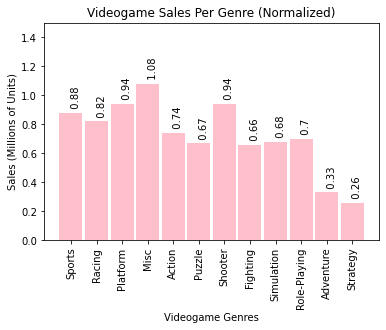

In [68]:
# Normalized genres vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Genres)))
y = list(normalized_genre_sales.values())
labels = list(normalized_genre_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,1.5])
plt.title('Videogame Sales Per Genre (Normalized)')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of Units)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')

plt.savefig('Eduardo_EDA_Plots/sales_by_genre_normalized.png', bbox_inches='tight')
    
# Show the plot
plt.show()

From the above, we see the majority of the game genres sell between 650-850 thousand units with the high being for the **Misc** genre, which on average makes roughly 1.1 million units per game. Now, the game genres that seem to sell the best on average are those which are **Misc**, **Platformers** and **Shooters**, and **Sports** games.  \
We want to quickly check some examples of games in the **Misc** genre to check for any recognizable names. 

In [69]:
# Checking for games in the Misc genre

print("Misc Games:")
display(dataclean.loc[dataclean['Genre'] == 'Misc'])

Misc Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
4,Wii Play,2006,Misc,28.92,E
8,Kinect Adventures!,2010,Misc,21.81,E
12,Brain Age: Train Your Brain in Minutes a Day,2005,Misc,20.15,E
39,Just Dance 3,2011,Misc,10.12,E10+
45,Just Dance 2,2010,Misc,9.44,E10+
...,...,...,...,...,...
6669,Space Channel 5: Ulala's Cosmic Attack,2002,Misc,0.02,E
6717,Online Chess Kingdoms,2006,Misc,0.02,E
6745,Rayman Raving Rabbids,2006,Misc,0.01,E
6788,Fullmetal Alchemist: Trading Card Game,2007,Misc,0.01,T


#### Checking Misc Genre Games

From this check above, we see that the games comprising this category can include dancing, karaoke, chess, boardgames, card games, or other music style games which do not fall predominantly into any of the other 11 categories considered.  \
These games include Wii Play, Kinect Games, Just Dance games, Chess, etc. 

## 3.2 Question 2: What is the *correlation* between *game ratings, sales, and genre*?

### Videogame Sales Based on Rating

The second question we want to address is to see which videogame genres sell the best! This can be done by looking into the column with the videogame **Genre** in the clean dataset and then look into the **Global_Sales** column. The idea to answer this question is to find the unique genres in the **Genre** column and then have a running sum for the values  for that row in the **Global_Sales** column.

In the same way that we set up the code to read and find the connections and take the data for the games based on the **Genre** and **Global_Sales**, we will do the same here with the **Rating**, first setting up a dictionary and moving forward.

In [70]:
# Begin setting up a dictionary for the rating_sales

# Creates the rating_sales dictionary
rating_sales = {    
}

# Takes the indicies of the dataclean dataframe
index = dataclean.index

# For each entry in the unique genres list (Videogame_Ratings), 
# we want to make a new dictonary word and set it equal to 0 entries
for word in Videogame_Ratings:
    rating_sales[word] = 0

# We want to move through the rows in the indicies here...
for rownumber in dataclean.index:
    # and store the respecitive values for that row from the rating column and sales column...
    ratingtype = dataclean.Rating[rownumber]
    gamesales = dataclean.Global_Sales[rownumber]
    # now check for the item in Videogame_Ratings...
    for uniquerating in Videogame_Ratings:
        # if they are both equal
        if uniquerating == ratingtype:
            # then add the value in the game sales column to that rating letter stored in the dictionary!
            rating_sales[uniquerating] += gamesales

# Format the values attached to the dictionary keys so that they have two decimal points (like in the original dataset)
for key in rating_sales:
    rating_sales[key] = round(rating_sales[key], 2)
    
print(rating_sales)

{'E': 1961.42, 'M': 1425.78, 'T': 1377.32, 'E10+': 540.55, 'AO': 1.95, 'RP': 0.03}


#### Rating_Sales Dictionary

Above, we created a rating_sales dictionary that holds every unique genre present in the dataset, and has the respecitive summation of all the sales made for that specific rating! \
From this, we can proceed to making a bar chart based on what is stored in this dictionary.

#### Ratings VS Sales Bar Chart

Here, we will be creating our Ratings and Sales Bar Chart. 

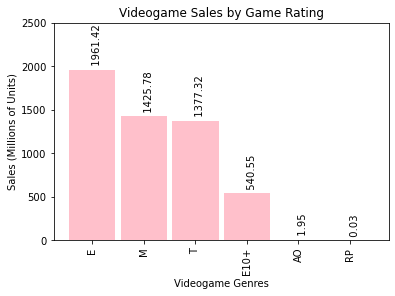

In [71]:
# Ratings vs sales bar chart

indicies = list(range(len(Videogame_Genres)))
barpositions = list(range(len(Videogame_Ratings)))
y = list(rating_sales.values())
labels = list(rating_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,2500])
plt.title('Videogame Sales by Game Rating')
plt.xlabel('Videogame Genres')
plt.ylabel('Sales (Millions of Units)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')

plt.savefig('Eduardo_EDA_Plots/sales_by_rating.png', bbox_inches='tight')
    
# Show the plot
plt.show()

From the above bar chart, we see that the games which are rated *E* for Everyone are the *most sold game rating*. Follwoing closely behind are those games rated *M* for Mature and *T* for Teen \
Games rated *E* sold almost 2 billion units worth of games, which games rated *M* and *T* sold roughly 1.4 and 1.3 billion units worth of games apiece.  \
As with the charts for the **Genre** versus the **Global_Sales**, we will also want to make sure that the sales for the cetegory are not the way they appear simply because of the number of games rated as each. We will check this now below and normalize the data after. 

In [72]:
# What are the rough number of games and names of the games rated as E, M and T?

print("E Rated Games:")
display(dataclean.loc[dataclean['Rating'] == 'E'])

print("M Rated Games:")
display(dataclean.loc[dataclean['Rating'] == 'M'])

print("T Rated Games:")
display(dataclean.loc[dataclean['Rating'] == 'T'])

E Rated Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
0,Wii Sports,2006,Sports,82.53,E
1,Mario Kart Wii,2008,Racing,35.52,E
2,Wii Sports Resort,2009,Sports,32.77,E
3,New Super Mario Bros.,2006,Platform,29.80,E
4,Wii Play,2006,Misc,28.92,E
...,...,...,...,...,...
6811,Micro Machines V4,2006,Racing,0.01,E
6816,Karnaaj Rally,2003,Racing,0.01,E
6817,Sébastien Loeb Rally Evo,2016,Racing,0.01,E
6819,Fast Racing Neo,2016,Action,0.01,E


M Rated Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
10,Grand Theft Auto V,2013,Action,21.04,M
11,Grand Theft Auto: San Andreas,2004,Action,20.81,M
13,Grand Theft Auto V,2013,Action,16.27,M
14,Grand Theft Auto: Vice City,2002,Action,16.15,M
17,Call of Duty: Modern Warfare 3,2011,Shooter,14.73,M
...,...,...,...,...,...
6803,Clive Barker's Jericho,2007,Shooter,0.01,M
6812,Saints Row: Gat out of Hell,2015,Action,0.01,M
6814,Legacy of Kain: Defiance,2003,Action,0.01,M
6821,Mortal Kombat: Deadly Alliance,2002,Fighting,0.01,M


T Rated Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
24,Super Smash Bros. Brawl,2008,Fighting,12.84,T
42,Final Fantasy VII,1997,Role-Playing,9.72,T
44,Gran Turismo 2,1999,Racing,9.49,T
56,Final Fantasy X,2001,Role-Playing,8.05,T
57,The Sims 3,2009,Simulation,8.01,T
...,...,...,...,...,...
6805,Wade Hixton's Counter Punch,2004,Sports,0.01,T
6809,King's Bounty: Armored Princess,2009,Role-Playing,0.01,T
6810,Transformers: Fall of Cybertron,2012,Action,0.01,T
6813,Dragon Ball Z for Kinect,2012,Fighting,0.01,T


From the above counts for the games in each of the three most commonly sold **Ratings**, there is some difference between the the number of games rated *E* and those rated *T*. Yet, interestingly enough, we see clearly here that more of a game rating does not mean that the game will sell more! The games rated *M* and *T* sold roughly 1.4 and 1.3 billion units worth of games, yet there were almost 1000 fewer *M* rated games (1433 games) compared to *T* rated games (2377).  \


### Normalize the Sales by Rating 

Now, we will go and normalize this data.

In [73]:
# Create a new normalized dictionary to hold normalized_genre_sales
normalized_rating_sales = {    
}

for word in Videogame_Ratings:
    normalized_rating_sales[word] = round(rating_sales[word]/len(dataclean.loc[dataclean['Rating'] == word]), 2)
    
print(normalized_rating_sales)

{'E': 0.94, 'M': 0.99, 'T': 0.58, 'E10+': 0.58, 'AO': 1.95, 'RP': 0.03}


#### Normalized Ratings vs Sales Bar Chart

With the new normalized dictionary that was made above, we can use this to print out a new normalized bar chart which will show us what a game of each rating will make on average. This imformation should now be more useful to us and have less fluctuation.

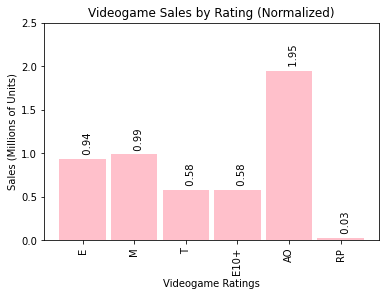

In [74]:
# Genres vs sales bar chart

indicies = list(range(len(Videogame_Ratings)))
barpositions = list(range(len(Videogame_Ratings)))
y = list(normalized_rating_sales.values())
labels = list(normalized_rating_sales.keys())

# Setting up the plot here

# Plot the x and y at a bar thickness of 0.9
plt.bar(barpositions, y, 0.9, color='pink')
axes = plt.gca()
axes.set_ylim([0,2.5])
plt.title('Videogame Sales by Rating (Normalized)')
plt.xlabel('Videogame Ratings')
plt.ylabel('Sales (Millions of Units)')
plt.xticks(barpositions, labels, rotation='vertical')
for index in range(len(y)): 
    plt.text(barpositions[index], y[index], '  ' + str(y[index]), rotation='vertical')

plt.savefig('Eduardo_EDA_Plots/sales_by_rating_normalized.png', bbox_inches='tight')

# Show the plot
plt.show()

From the above, we immediately see that there is a spike for the *AO* rating, which is for Adults Only. 

We will investigate this to see what is happening...

In [75]:
# Investigating the clear spike anomaly in Adult Only games.

print("AO Rated Games:")
display(dataclean.loc[dataclean['Rating'] == 'AO'])

AO Rated Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
578,Grand Theft Auto: San Andreas,2005,Action,1.95,AO


In the entire dataset, we see that there is only **1** game that is rated AO. This game is Grand Theft Auto: San Andreas, released in 2005.

Upon further investigation, since this game also appears to originally have been sold in 2004 and was rated *M*, we went on to see what was unique about this seperate release. It just so happens that the developers had removed some more explicit features from the original base game which released in 2004, but that gamers had found a way to access this *"removed"* content which was hidden, yet left in the game's source code... 

As a result of this "new" version of the game which was now burned onto disks and circulated as being the 2005 version, the ERSB considered this a seperate game and gave it the *Adult Only* rating, which for most games hoping to make it internationally or sell very well, is a death sentence. 

With the exception then of the *AO* rating, we see the majority of the game rated sell at roughly 550 thousand units to a million units on average. *E* and *M* rated games sell for roughly a million units on average, with *T* and *E10+* selling roughly 550 thousand units on average.

From this, we can conclude that quite clearly the best genre of games are *M* Mature games which tend to have some graphic content or violence, which is  targeted to audiences of ages 17+, and *E* Everyone games, which includes sports, family, etc. kinds of games which are suitable for everyone. Both of these game ratings appeal to the greatest and most general audience, which makes sense that they should be topping the **Global_Sales** list. 

## 3.3 Question 3: When did ratings begin for videogames?

### Find out what game that had the first ratings (and in which year)

For this question, we want to simply find out what was the game, and year it came out in, which had the first rating.

To do this, we will take in the index of the game with the earliest year in the **Year_of_Release** column, and then take the game's name and the platform it came out on. 

In [76]:
# Investigate to find what is the earliest game on the list released with a rating
min_year_index = dataclean[['Year_of_Release']].idxmin()
min_year_game = dataclean['Name'][min_year_index].item()
min_year_platform = rawdataclean['Platform'][min_year_index].item()

print('The earliest game on the list is:', min_year_game)
print('It was originally released in', dataclean['Year_of_Release'].min())
print('It was re-released on the', min_year_platform, 'platform \n')

# Check games
print("Check the game 'Alter Ego':")
display(dataclean.loc[dataclean['Name'] == 'Alter Ego'])

print('\n', 'Checking Other Games:')
display(dataclean[(dataclean['Year_of_Release'] == 1988) | (dataclean['Year_of_Release'] == 1992) | 
                  (dataclean['Year_of_Release'] == 1994) | (dataclean['Year_of_Release'] == 1996)])

The earliest game on the list is: Alter Ego
It was originally released in 1985
It was re-released on the PC platform 

Check the game 'Alter Ego':


,Name,Year_of_Release,Genre,Global_Sales,Rating
6401,Alter Ego,1985,Simulation,0.03,T



 Checking Other Games:


,Name,Year_of_Release,Genre,Global_Sales,Rating
108,Tekken 2,1996,Fighting,5.74,T
140,Resident Evil,1996,Action,5.05,M
157,Tomb Raider,1996,Action,4.63,T
596,PaRappa The Rapper,1996,Misc,1.92,E
752,Diablo,1996,Role-Playing,1.59,M
1002,Battle Arena Toshinden,1994,Fighting,1.27,T
1276,Tomb Raider,1996,Action,1.03,M
4800,Super Puzzle Fighter II Turbo,1996,Puzzle,0.14,E
6430,Doom,1992,Shooter,0.03,M
6432,SimCity,1988,Simulation,0.03,E10+


From the above, we see that the earliest game with a rating was the game *"Alter Ego"*, and it originally had come out in 1985 for the Commodore 64, MS-DOS, Apple II, and the Apple Macintosh. There is some difference in the year of release, as this dataset says it is 1985, though other entries say 1986. Regardless, this is interesting because the ESRB did not exist in 1985 or 86'. The ESRB was created in 1994 (under a different name then) and the ratings changed into those we see today in 1999.

So then how could it be that this game has an ESRB rating?

This is becuase the game was rereleased again on the PC more than two decades later in 2010, and it was this release of the game which was given a rating of *T*. Since the game was a direct port to the PC, the rating for the PC version applied to the original 1985 version. (The PC version here is not shown due to there being NaNs associated with the data, thus it does not appear in the cleaned data or cleaned raw data sets.)

Checking against the two other games which are listed as being rated but also originally released before 1994, we see *SimCity* and *Doom* - both of which have been rereleased multiple times over since their original releases, so these games being rated makes sense. 

The first game rated by the ESRB on the original release was *Battle Arena Toshinden*, which released on the original PlayStation in 1994 and was rated *T* for Teen! This confirms that the original games rated by the ESRB was in the year it was created in, in 1994. Then in 1996, we see plenty of games having the ESRB ratings, which is good and expected.